In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [81]:
data=pd.read_csv('../input/master.csv')

**ZIP METHOD EXAMPLE**

In [82]:
products=['Milk', 'Eggs']
amount=['3','5']
list_label=['products','amount']
list_col=[products,amount]
zipped= list(zip(list_label,list_col))
data_dict=dict(zipped)
df=pd.DataFrame(data_dict)
df

,products,amount
0,Milk,3
1,Eggs,5


In [83]:
#we can new column

df['brand']=['Nestle','LDC']
df['storage temp.']=4
df

,products,amount,brand,storage temp.
0,Milk,3,Nestle,4
1,Eggs,5,LDC,4


**VISUALISATION EXERCISES**

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


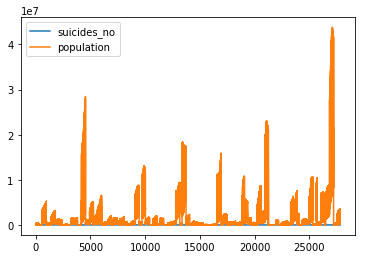

In [85]:
data1=data.loc[:,['suicides_no','population']]
data1.plot()
plt.show()

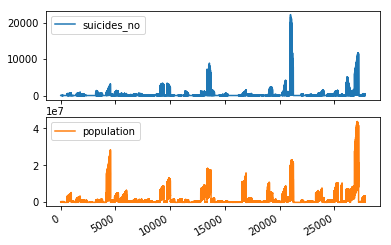

In [86]:
data1.plot(subplots=True)
plt.show()

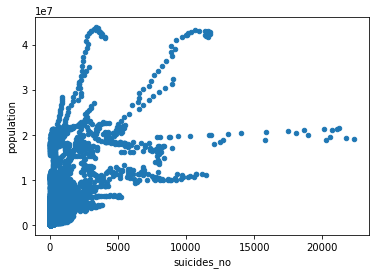

In [87]:
#scatter plot
data1.plot(kind='scatter',x='suicides_no',y='population') #makes no sense, just to make example
plt.show()

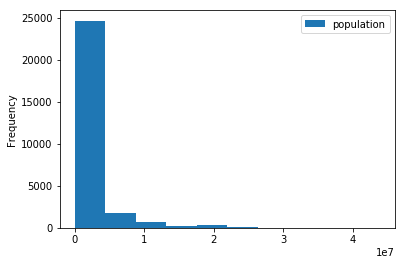

In [88]:
#histogram

data1.plot(kind='hist',y='population',cumulative=False) #numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)[source]
plt.show()

**TIME SERIES**

In [89]:
import warnings
warnings.filterwarnings("ignore")

data2=data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object #adding new column
data2= data2.set_index("date")
data2


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
date,,,,,,,,,,,,
1992-01-10,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1992-02-10,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
1992-03-10,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
1993-03-15,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
1993-03-16,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [90]:
print(data2.loc["1993-03-16"])

country                     Albania
year                           1987
sex                            male
age                     25-34 years
suicides_no                       9
population                   274300
suicides/100k pop              3.28
country-year            Albania1987
HDI for year                    NaN
 gdp_for_year ($)     2,156,624,900
gdp_per_capita ($)              796
generation                  Boomers
Name: 1993-03-16 00:00:00, dtype: object


In [91]:
#or we can list between two dates
print(data2.loc["1992-03-10":"1993-03-16"])

            country  year       ...        gdp_per_capita ($)       generation
date                            ...                                           
1992-03-10  Albania  1987       ...                       796     Generation X
1993-03-15  Albania  1987       ...                       796  G.I. Generation
1993-03-16  Albania  1987       ...                       796          Boomers

[3 rows x 12 columns]


***RESAMPLING EXERCISE TIME SERIES***

In [92]:
data_samp=data2.resample('M').mean()
print(data_samp)

              year         ...          gdp_per_capita ($)
date                       ...                            
1992-01-31  1987.0         ...                       796.0
1992-02-29  1987.0         ...                       796.0
1992-03-31  1987.0         ...                       796.0
1992-04-30     NaN         ...                         NaN
1992-05-31     NaN         ...                         NaN
1992-06-30     NaN         ...                         NaN
1992-07-31     NaN         ...                         NaN
1992-08-31     NaN         ...                         NaN
1992-09-30     NaN         ...                         NaN
1992-10-31     NaN         ...                         NaN
1992-11-30     NaN         ...                         NaN
1992-12-31     NaN         ...                         NaN
1993-01-31     NaN         ...                         NaN
1993-02-28     NaN         ...                         NaN
1993-03-31  1987.0         ...                       796

In [93]:
interpolated = data_samp.interpolate(method='linear') #interpolations assigns new values  within the range of a discrete set of known data points.
print(interpolated)

              year         ...          gdp_per_capita ($)
date                       ...                            
1992-01-31  1987.0         ...                       796.0
1992-02-29  1987.0         ...                       796.0
1992-03-31  1987.0         ...                       796.0
1992-04-30  1987.0         ...                       796.0
1992-05-31  1987.0         ...                       796.0
1992-06-30  1987.0         ...                       796.0
1992-07-31  1987.0         ...                       796.0
1992-08-31  1987.0         ...                       796.0
1992-09-30  1987.0         ...                       796.0
1992-10-31  1987.0         ...                       796.0
1992-11-30  1987.0         ...                       796.0
1992-12-31  1987.0         ...                       796.0
1993-01-31  1987.0         ...                       796.0
1993-02-28  1987.0         ...                       796.0
1993-03-31  1987.0         ...                       796

**MANIPULATING DATA**

In [94]:
data3=data.head(8) #first 8 values of dataset

In [95]:
data3['population'][2] #it shuld give 289700 which is second inde according to phyton

289700

In [96]:
data3.sex[2]

'female'

In [97]:
data3.loc[2,['suicides_no']] #it can be done by loc function as well

suicides_no    14
Name: 2, dtype: object

In [99]:
#now we can try to select certain columns
data3[['age','population']]

,age,population
0,15-24 years,312900
1,35-54 years,308000
2,15-24 years,289700
3,75+ years,21800
4,25-34 years,274300
5,75+ years,35600
6,35-54 years,278800
7,25-34 years,257200


In [100]:
print(type(data3['age']))

<class 'pandas.core.series.Series'>


In [102]:
data3.loc[2:4,'age':'population']

,age,suicides_no,population
2,15-24 years,14,289700
3,75+ years,1,21800
4,25-34 years,9,274300


In [110]:
data3.loc[4:2:-1,'age':'population']

,age,suicides_no,population
4,25-34 years,9,274300
3,75+ years,1,21800
2,15-24 years,14,289700


In [121]:
#Filtering Data Frame

filter1=data.suicides_no<10 
filter2=data.suicides_no>5
filter3=data.population<10000
data[filter1 & filter2 & filter3]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15306,Luxembourg,1985,male,75+ years,6,6900,86.96,Luxembourg1985,0.752,"4,738,559,685",13743,G.I. Generation
15378,Luxembourg,1991,male,75+ years,8,7700,103.90,Luxembourg1991,NaN,"14,321,878,795",39465,G.I. Generation
15390,Luxembourg,1992,male,75+ years,6,7600,78.95,Luxembourg1992,NaN,"16,065,740,778",43740,G.I. Generation
15414,Luxembourg,1994,male,75+ years,8,7500,106.67,Luxembourg1994,NaN,"18,325,791,415",48610,G.I. Generation
15486,Luxembourg,2000,male,75+ years,7,8005,87.45,Luxembourg2000,0.851,"21,263,514,833",51841,G.I. Generation
15511,Luxembourg,2002,male,75+ years,6,8635,69.48,Luxembourg2002,NaN,"23,616,328,816",56484,Silent
15522,Luxembourg,2003,male,75+ years,6,9133,65.70,Luxembourg2003,NaN,"29,557,325,056",69768,Silent
15534,Luxembourg,2004,male,75+ years,6,9641,62.23,Luxembourg2004,NaN,"34,685,281,848",80639,Silent


In [122]:
data3.population[data3.age=='25-34 years']

4    274300
7    257200
Name: population, dtype: int64

Transforming Data

In [123]:
data3.population.apply(lambda n: n/2)

0    156450.0
1    154000.0
2    144850.0
3     10900.0
4    137150.0
5     17800.0
6    139400.0
7    128600.0
Name: population, dtype: float64

In [126]:
data3['rate']=data3.suicides_no/data3.population
data3

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


Changing Index Name and Number

In [131]:
#as it is seen on table there is no index name and it starts from 0

data3.index=range(1,9,1)
data3.index.name='index'
data3


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
index,,,,,,,,,,,,,
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
7,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
8,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


Hierarchical Indexing

In [135]:
data4=data3.set_index(['age','sex'])
data4

,,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
age,sex,,,,,,,,,,,
15-24 years,male,Albania,1987,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
35-54 years,male,Albania,1987,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
15-24 years,female,Albania,1987,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
75+ years,male,Albania,1987,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
25-34 years,male,Albania,1987,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
75+ years,female,Albania,1987,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
35-54 years,female,Albania,1987,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
25-34 years,female,Albania,1987,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


In [142]:
data3

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
index,,,,,,,,,,,,,
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
7,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
8,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


In [140]:
data3.pivot(index="sex",columns = "age",values="suicides_no") # it shows how many suicides happens according to age and sex from data3 above

age,15-24 years,25-34 years,35-54 years,75+ years
sex,,,,
female,14,4,6,1
male,21,9,16,1


In [145]:
data5 = data3.set_index(["age","sex"])
data5

,,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
age,sex,,,,,,,,,,,
15-24 years,male,Albania,1987,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
35-54 years,male,Albania,1987,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
15-24 years,female,Albania,1987,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
75+ years,male,Albania,1987,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
25-34 years,male,Albania,1987,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
75+ years,female,Albania,1987,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
35-54 years,female,Albania,1987,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
25-34 years,female,Albania,1987,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


In [146]:
data5.unstack(level=1) #sex is moved as upper index.

country             ...         rate          
sex           female     male    ...       female      male
age                              ...                       
15-24 years  Albania  Albania    ...     0.000048  0.000067
25-34 years  Albania  Albania    ...     0.000016  0.000033
35-54 years  Albania  Albania    ...     0.000022  0.000052
75+ years    Albania  Albania    ...     0.000028  0.000046

[4 rows x 22 columns]

In [149]:
#also possible to switsch outer and inner position
data6 = data5.swaplevel(0,1)
data6

,,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
age,sex,,,,,,,,,,,
15-24 years,male,Albania,1987,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
35-54 years,male,Albania,1987,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
15-24 years,female,Albania,1987,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048
75+ years,male,Albania,1987,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000046
25-34 years,male,Albania,1987,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000033
75+ years,female,Albania,1987,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,0.000028
35-54 years,female,Albania,1987,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent,0.000022
25-34 years,female,Albania,1987,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers,0.000016


In [153]:
data7=data3.head(3)
data7

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,rate
index,,,,,,,,,,,,,
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000067
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,0.000052
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,0.000048


In [154]:
pd.melt(data7,id_vars="age",value_vars=["sex","population"])

,age,variable,value
0,15-24 years,sex,male
1,35-54 years,sex,male
2,15-24 years,sex,female
3,15-24 years,population,312900
4,35-54 years,population,308000
5,15-24 years,population,289700


In [157]:
data7.groupby("sex").mean()  #max(),min() etc..

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),rate
sex,,,,,,,
female,1987.0,14.0,289700.0,4.83,NaN,796.0,0.000048
male,1987.0,18.5,310450.0,5.95,NaN,796.0,0.000060


In [160]:
data7.groupby("sex")[['suicides_no','population']].mean()  

,suicides_no,population
sex,,
female,14.0,289700.0
male,18.5,310450.0
